# Direct Python - HamiltonFastMarching library link 

In this notebook, we reproduce the first experiment in A1_Isotropic, but replacing the call to the FileHFM executable with a direct usage of the PythonHFM library. It should soon be available as a conda package, providing even better ease of installation.

# From PyBind11 compiled

In [19]:
# Minor difference here
#PythonHFM_binary_dir = '/Users/jean-mariemirebeau/Documents/bin/HFM/PyBind11HFM/'
#PythonHFM_extension = '.cpython-36m-darwin.so'
#import PythonIO

In [11]:
import os
os.path.splitext('hello.ipynb')

('hello', '.ipynb')

# From HFMpy

In [1]:
import sys; sys.path.insert(0,'..')
import HFMUtils
import numpy as np

In [2]:
from importlib import reload
HFMUtils = reload(HFMUtils)

In [3]:
HFMUtils.FileHFM_binary_dir = '/Users/mirebeau/bin/HamiltonFastMarching/FileHFM/Release'

In [4]:
hfmIn = HFMUtils.Rect([0,0],[1,1],sampleBoundary=True,dimx=100)

In [7]:
hfmIn.update({
    'seeds':[[0.5,0.5]],
    'tips':[[0.8,0.4]],
    'model':'Isotropic2',
    'cost':1,
})

In [8]:
hfmOut = HFMUtils.Run(hfmIn)

In [9]:
print(hfmOut['log'])

Field verbosity defaults to 1
Field arrayOrdering defaults to RowMajor
Field order defaults to 1
Field showProgress defaults to 0
Fast marching solver completed in 0.002594 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.0001
Field geodesicVolumeBound defaults to 4.225
Field exportValues defaults to 0
Field exportActiveNeighs defaults to 0
Field exportGeodesicFlow defaults to 0



In [21]:
def ListToNDArray(params):
	for (key,val) in params.items():
		if isinstance(val,list):
			params[key]=np.array(val)

In [22]:
par = {'a':[0,1]}
ListToNDArray(par)
par

{'a': array([0, 1])}

In [23]:
np.array([0,1])

array([0, 1])

# Main code

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
modelName = 'Isotropic2' # Isotropic two-dimensional eikonal equation

hfmInput = {}
hfmInput['sndOrder']=1. # Use a second order scheme, so as to increase accuracy
hfmInput['cost'] = 1. # Unit cost for now. A position dependent cost function is also considered below.
# hfmInput['speed']=1. # One may equivalently provide a speed function. In that case cost = 1/speed.

In [22]:
n=100
hfmInput['dims']=np.array([2*n,n]) # Every input array must be a numpy array
hfmInput['gridScale']=1./n
hfmInput['origin']=np.array([-1.,0.]) # 'origin' defaults to [0.,0.] if unspecified

In [23]:
hfmInput['seeds']=np.array([[-0.5,0.3],[0.5,0.8]]) # Introduce two seeds, at positions (-0.5,0.3) and (0.5,0.8)
hfmInput['seedValues']=np.array([0.,0.5]) # Boundary conditions imposed at the seeds. 
# 'seedValues' defaults [0.,0.] if unspecified. 

In [24]:
hfmInput['pointToIndex'] = hfmInput['seeds'] # Request the multi-indices of these points (our seeds)
hfmInput['indexToPoint'] = np.array([ [5,10], [20,15], [50,30] ]) # Request the points associated to these indices

In [25]:
hfmInput['exportValues']=1. # Ask for the PDE solution
hfmInput['exportGeodesicFlow']=1 # Ask for the geodesic flow 

In [26]:
hfmInput['tips'] = np.array([[0.,0.6],[-0.9,0.5],[0.8,0.8]]) # Ask for the geodesics from these three points
#hfmInput['geodesicSolver']='ODE' # Choose the backtracking method. Defaults to 'Discrete' if unspecified.

In [27]:
hfmInput['arrayOrdering']='YXZ_RowMajor'
hfmInput['dummyKey']='dummyValue' # For demonstration purposes, we also add a dummy, useless input key

In [28]:
# Minor difference here
hfmOutput = PythonIO.WriteCallRead(hfmInput, "PythonHFM_"+modelName, binary_dir = PythonHFM_binary_dir, extension = PythonHFM_extension)

Field verbosity defaults to 1

Field showProgress defaults to 0

Fast marching solver completed in 0.015687 s.

Field geodesicSolver defaults to Discrete

Field geodesicStep defaults to 0.25

Field geodesicWeightThreshold defaults to 0.0001

Field geodesicVolumeBound defaults to 4.225

Field exportActiveNeighs defaults to 0








In [30]:
hfmOutput.keys()

dict_keys(['FMCPUTime', 'MaxStencilWidth', 'StencilCPUTime', 'defaulted', 'geodesicFlow', 'geodesicLengths', 'geodesicPoints', 'indexFromPoint', 'nAccepted', 'pointFromIndex', 'unusedFromCompute', 'unusedFromUser', 'values', 'visitedUnset'])

In [31]:
print("Unused input keys : ", hfmOutput['unusedFromUser'],"\n") 
print("Defaulted input keys : ", hfmOutput['defaulted'],"\n") 
print("Output keys : ", hfmOutput.keys(),"\n")

Unused input keys :  dummyKey  

Defaulted input keys :  exportActiveNeighs geodesicSolver geodesicStep geodesicVolumeBound geodesicWeightThreshold showProgress verbosity  

Output keys :  dict_keys(['FMCPUTime', 'MaxStencilWidth', 'StencilCPUTime', 'defaulted', 'geodesicFlow', 'geodesicLengths', 'geodesicPoints', 'indexFromPoint', 'nAccepted', 'pointFromIndex', 'unusedFromCompute', 'unusedFromUser', 'values', 'visitedUnset']) 



In [32]:
index = hfmOutput['indexFromPoint'][1,:].astype(int) # This is the index of seed number 1, that we requested above.
print(hfmOutput['values'][index[1],index[0]] ) # Note the YXZ convention.

0.5


In [33]:
hfmOutput['pointFromIndex'] # Points associated with the multi-indices provided in the indexToPoint input field

array([[-0.945,  0.105],
       [-0.795,  0.155],
       [-0.495,  0.305]])

In [34]:
X,Y = np.meshgrid(np.linspace(-1,1,2*n),np.linspace(0,1,n)) # Create a coordinate system

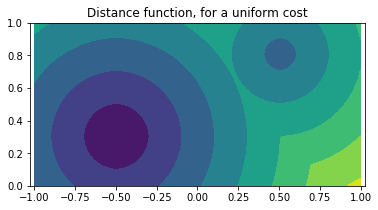

In [35]:
plt.figure(figsize=[6,3]); plt.title('Distance function, for a uniform cost'); plt.axis('equal');
plt.contourf(X,Y,hfmOutput['values']); # Display the value function. 